# **Project summary :**

**I. Data exploration**

**II. Data pre-processing**

**III. Model building**

In [1]:
# python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# pre-processing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler




**I. Data exploration**

First of all let us take a look at our data to try to detect challenges that we might encounter. In the dataset description we know that it is heavily unbalanced so we should definitly explore that.

In [2]:
data =  pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

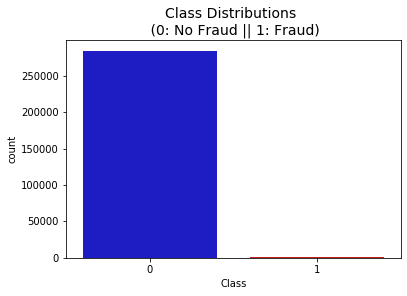

In [5]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

We can already see that 99,83% of the data is composed of valid transactions as opposed to 0,17% of fraudulous transactions. This makes sense since for any given bank you'd better hope that most transactions are not frauds. However, this might prove to be a challenge while bulding our classification model since a model that **systematically** predicts valid transactions would be right 99,83% of the time. Yet, it would be useless since it is these rare cases of fraud that we want to catch.

In [6]:
print("ammount of null values :", data.isnull().sum().max())

ammount of null values : 0


As we can see above we do not have any null values nor do we have non numerical values. This will make it easier for us going forward.

**II. Data pre-processing**

The main issue we are going to challenge when pre-processing our data is to make our data set balanced again, so that our model can learn to distinguish between fraudulent and valid transactions. There are different methods to do this. You can augment the smaller class or disminsih the bigger one.

In [7]:
valid_transactions = data.loc[data.Class == 0]
fraudulent_transactions = data.loc[data.Class == 1]

subset_valid_transactions = valid_transactions.sample(n=492)
balanced_data = (pd.concat([fraudulent_transactions, subset_valid_transactions])).sample(frac=1, axis=0).reset_index(drop=True)
print("fraudulent transactions count :", len(balanced_data.loc[balanced_data.Class == 1]))
print("valid transactions count :", len(balanced_data.loc[balanced_data.Class == 0]))


fraudulent transactions count : 492
valid transactions count : 492


We just extarcted a random sample of length = 492 from the valid transactions and concatenated it with the fraudulent transactions to compose a balanced dataset. Now, before we proceed to bulding ou model, let's scale the data.

In [8]:
balanced_data['scaled_amount'] = StandardScaler().fit_transform(balanced_data['Amount'].values.reshape(-1,1))
balanced_data['scaled_time'] = StandardScaler().fit_transform(balanced_data['Time'].values.reshape(-1,1))

balanced_data.drop(['Time','Amount'], axis=1, inplace=True)

**III. Model building**

Our goal is to be able to detect fraudulent transactions with the highest recall ? accuracy ? precision ? possibe. To do so, we will try a couple of different classifiers. Let us first split our data into training set and test set.

In [9]:
X = balanced_data.drop('Class', 1)
y = balanced_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
search_logistic_regression = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, scoring='f1')
search_logistic_regression.fit(X_train, y_train)
print("log reg best f1 score :", search_logistic_regression.best_score_)




/home/younes/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/younes/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/younes/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/younes/anacon

log reg best f1 score : 0.9508508027257353


/home/younes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/younes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

In [11]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
search_k_neighbours = GridSearchCV(KNeighborsClassifier(), knears_params, scoring='f1')
search_k_neighbours.fit(X_train, y_train)
print("kn best f1 score :", search_k_neighbours.best_score_)

kn best f1 score : 0.9428362175656465


In [12]:
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
search_SVC = GridSearchCV(SVC(), svc_params, cv=5, scoring='f1')
search_SVC.fit(X_train, y_train)
print("svc best f1 score :", search_SVC.best_score_)


svc best f1 score : 0.9507960634507733


In [13]:
decision_tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
search_decision_tree = GridSearchCV(DecisionTreeClassifier(), decision_tree_params, cv=5, scoring='f1')
search_decision_tree.fit(X_train, y_train)
print("decision tree best f1 score :", search_decision_tree.best_score_)


decision tree best f1 score : 0.9152510806412856


It seems like our best classifier on this problem is logisitic regrssion. Now we want to check if we are overfiting the training data by using the test set.

In [14]:
log_reg = search_decision_tree.best_estimator_
y_pred = log_reg.predict(X_test)
print("log reg f1 score :", f1_score(y_test, y_pred))



log reg f1 score : 0.9282296650717703


It seems like our model can generalize since their performance on the test set is similar to that on the training set.